# Cuidado! Lluvia de Hamburguesas: 

## Análisis con el Baseline TP 1


### Integrantes
* Primerano Lomba, Franco Alejandro
* Montecalvo, Ignacio

## Baseline

Ahora buscamos obtener algunas métricas que devuelve nuestro primer "modelo", el cual es el Baseline del TP 1. El modelo es muy simple, por lo tanto no esperamos que los scores sean muy altos, sin embargo, nos será útil para poder establecer una comparación con los modelos utilizados en esta segunda parte.

Sin embargo, es importante aclarar dos cosas:
* En primer lugar, a pesar de que se va a evaluar con los datos del set de validación, este baseline fue construido mirando todos los datos, incluyendo los que en este segundo TP forman parte de los subsets de validación y hold out, con lo cual, la evaluación a la que vamos a someter al baseline no es la más indicada.

* En segundo lugar, es necesario destacar que nuestro baseline NO tiene la capacidad de predecir probabilidades, sólo clasifica devolviendo 'si' o 'no', por lo que esto repercutirá negativamente en el AUC score.

### Configuraciones iniciales

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score, recall_score, precision_score, f1_score

from auxiliares import obtener_training_set
from auxiliares import obtener_valdev_set
from auxiliares import obtener_prediccion_set
from auxiliares import plot_confusion_matrix
from auxiliares import plot_roc

### Función Baseline 

In [14]:
from typing import List
def baseline(X: pd.DataFrame) -> List[str]:
    
    cond_relacion_presion_humedad = ( (X.presion_atmosferica_tarde < 990 ) |
                                     ((X.humedad_tarde >= 55) & (X.presion_atmosferica_tarde < 1005)) |
                                     ((X.humedad_tarde >= 74) & (X.presion_atmosferica_tarde < 1012)) |
                                     ((X.humedad_tarde >= 84) & (X.presion_atmosferica_tarde < 1020)) )
    
    prediccion = pd.Series(np.zeros(len(X))).replace({1: "si", 0: "no"})
    
    prediccion[(X.humedad_tarde >= 79)                 | 
               (X.rafaga_viento_max_velocidad > 95)    | 
               (X.mm_lluvia_dia >= 50 )                |
               (X.presion_atmosferica_tarde <= 994)    |
               cond_relacion_presion_humedad     
              ]= 'si'
    
    return prediccion.to_list()

### Evaluación del modelo

Ahora cargamos el set de datos con el que vamos a evaluar:

In [15]:
x_val, y_val = obtener_valdev_set() 

Estos datos ya fueron cargados con la lógica de preprocesamiento utilizada para el TP 1, así que directamente realizamos las predicciones y medimos el rendimiento.

In [16]:
predicciones = baseline(x_val)

In [17]:
def obtener_target_num(target):
    target_num = []
    
    for i in target:
        if (i == 'si'):
            target_num.append(1)
        else:
            target_num.append(0)
            
    return target_num

In [18]:
predicciones_num = obtener_target_num(predicciones)
y_val_num = obtener_target_num(y_val.llovieron_hamburguesas_al_dia_siguiente)

python### Scores

#### AUC ROC



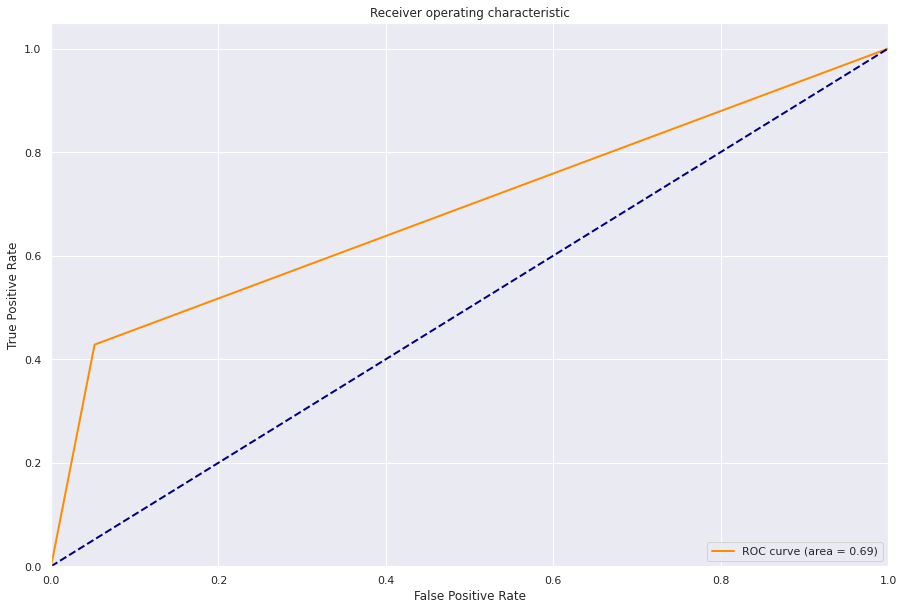

AUC ROC SCORE:  0.6880969433568567


In [19]:
fpr, tpr, thresholds = roc_curve(y_val_num, predicciones_num, pos_label=1)
plot_roc(fpr, tpr, thresholds)
auc = roc_auc_score(y_val_num, predicciones_num)
print("AUC ROC SCORE: ",auc)

#### Matriz de confusión



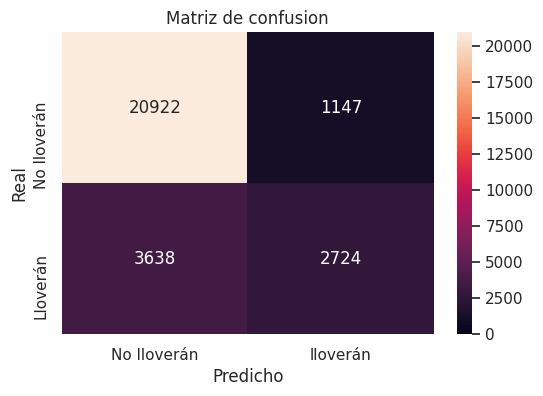

In [20]:
plot_confusion_matrix(y_val, predicciones)

#### Accuracy

In [21]:
accuracy = accuracy_score(y_val,predicciones)
print("ACCURACY SCORE: ",accuracy)

ACCURACY SCORE:  0.8316977946607577


#### Precision y Recall 



In [22]:
precision = precision_score(y_val.llovieron_hamburguesas_al_dia_siguiente,predicciones, pos_label='si')
recall = recall_score(y_val.llovieron_hamburguesas_al_dia_siguiente,predicciones, pos_label='si')

print("PRECISION: ",precision,"\nRECALL: ",recall)

PRECISION:  0.703694135882201 
RECALL:  0.42816724300534426


#### F1 Score

In [23]:
f1 = f1_score(y_val, predicciones, pos_label='si')
print("F1 SCORE: ", f1)

F1 SCORE:  0.5323951920257989


In [24]:
pd.DataFrame(data=[auc, accuracy, precision,recall,f1],
             index= ['AUC ROC','Accuracy','Precision','Recall','F1 Score'],
             columns=['KNN Scores'])

,KNN Scores
AUC ROC,0.688097
Accuracy,0.831698
Precision,0.703694
Recall,0.428167
F1 Score,0.532395


Teniendo en cuenta la gran simpleza de este modelo, los scores obtenidos no están nada mal. De hecho, dejando de lado el AUC Score, el cual como ya se aclaró, NO fue calculado con las probabilidades de pertenecer a cada clase, si tenemos en cuenta las demás métricas podemos notar que el baseline puede competir con alguno de los modelos presentados, especialmente con los que peor scores obtuvieron.